In [1]:
import os
import re
import glob
import math
import numpy             as np
import matplotlib.pyplot as plt
from datetime            import datetime
from scipy.interpolate   import make_interp_spline

In [2]:
threshold = np.linspace(0.01, 60, 31)  #not used
slope = np.linspace(0.01, 10, 50)      #not used
gamma = np.linspace(0.01, 0.99, 100)   #used for prob o gamma
delta = 0.02                           #not used

In [3]:
TSIDs = ['TEST', 'TEST-2ifc', 'TS009']   #enter TSIDs

In [4]:
file_path = os.path.join(glob.glob('C:\\Users\\mvomstein\\projects\\vt-2pod-master')[0], 'DATA')

In [5]:
#for i in os.listdir(file_path): print(i)

In [6]:
for TSID in TSIDs:
    fpTS = os.path.join(file_path, TSID)

    for file in os.listdir(fpTS):
        if os.path.splitext(file)[1] == '.npy':
            x = re.split("_", file)
            if "user" in x:
                del x[x.index("user")]
            globals()[x[0] + "_" + x[1] + "_" + x[2] + "_" + x[3]] = np.load(os.path.join(fpTS, file), allow_pickle=True)

[[[30.   1. ]
  [20.   1. ]
  [12.5  0. ]
  [30.   1. ]
  [25.   1. ]
  [20.   1. ]
  [ 7.5  1. ]
  [25.   1. ]
  [ 7.5  0. ]
  [20.   1. ]
  [20.   1. ]
  [17.5  1. ]
  [15.   1. ]
  [ 2.5  1. ]
  [20.   1. ]
  [ 5.   1. ]
  [22.5  1. ]
  [ 5.   1. ]
  [22.5  1. ]
  [ 5.   0. ]
  [17.5  1. ]
  [17.5  1. ]
  [15.   0. ]
  [20.   1. ]
  [20.   1. ]
  [20.   0. ]
  [27.5  1. ]
  [27.5  1. ]
  [25.   1. ]
  [25.   0. ]
  [35.   1. ]
  [35.   1. ]
  [32.5  1. ]
  [32.5  1. ]
  [32.5  1. ]
  [30.   1. ]
  [30.   1. ]
  [ 2.5  0. ]
  [22.5  1. ]
  [22.5  1. ]
  [22.5  1. ]
  [22.5  0. ]
  [ 2.5  1. ]
  [32.5  1. ]
  [32.5  1. ]
  [30.   1. ]
  [30.   1. ]
  [30.   1. ]
  [ 2.5  1. ]
  [30.   1. ]]

 [[30.   1. ]
  [20.   1. ]
  [12.5  0. ]
  [30.   1. ]
  [25.   1. ]
  [20.   1. ]
  [ 7.5  1. ]
  [25.   1. ]
  [ 7.5  1. ]
  [ 7.5  1. ]
  [ 2.5  1. ]
  [27.5  1. ]
  [10.   0. ]
  [27.5  1. ]
  [27.5  1. ]
  [25.   1. ]
  [22.5  0. ]
  [35.   1. ]
  [32.5  1. ]
  [32.5  1. ]
  [32.5  1. ]
  [3

<IPython.core.display.Javascript object>


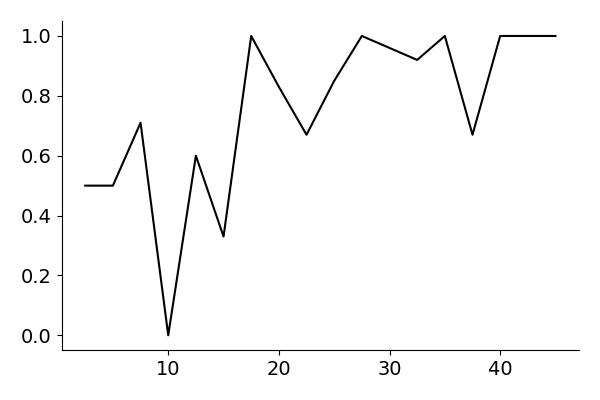

In [20]:
StimRespALL = np.zeros(shape=[len(TSIDs), len(globals()[TSIDs[0]+'_forearm'+'_'+'h'+'_stim']), 2])

t = 0
for TSID in TSIDs:

    stim = globals()[TSID+'_forearm'+'_'+'h'+'_stim']
    resp = globals()[TSID+'_forearm'+'_'+'h'+'_response']
    
    StimResp = np.zeros(shape=[len(stim), 2])

    for i in range(0,len(stim)):
        StimResp[i] = [stim[i], resp[i]]
        
    StimRespALL[t] = StimResp
    
    t=t+1

StimRange = globals()[TSID+'_forearm'+'_'+'h'+'_stimRange']

StimRespCounter = np.zeros(shape=[3, len(StimRange)])
StimRespCounter[2] = StimRange

for a in StimRespALL:
    for b in a:
        
        x = np.where(StimRespCounter[2] == b[0])
        StimRespCounter[0][x] = StimRespCounter[0][x]+b[1]
        StimRespCounter[1][x] = StimRespCounter[1][x]+1
        

        
print(StimRespALL)
print()
print(np.round_(StimRespCounter, 1))
print()
print(np.round_(StimRespCounter[0]/StimRespCounter[1], 2))

#________________________________________________


plt.rc('font', size=14)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.tight_layout()

x_values = StimRespCounter[2]
y_values = np.round_(StimRespCounter[0]/StimRespCounter[1], 2)


ax.plot(x_values, y_values, color='k', linestyle='-')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.savefig(TSID + '_Prob_o_Gamma')

plt.show()

In [8]:
#Function: Get mean of Param:

def getmean(bs, hv, param):
    
    matches = [match for match in globals() if bs+'_'+hv+'_'+param in match]
    
    if globals()[matches[0]].shape == (): length = 1 #Einzelne Werte sind in den .npy files nicht als array gespeichert
                                                     #und haben deshalb eine Dimension geringer!!! 
    else: length = len(globals()[matches[0]])
    
    collect = np.empty(shape=[0, length])

    for m in matches:
        if globals()[m].shape == (): globals()[m] = np.array([globals()[m]])
            
        collect = np.append(collect, [globals()[m]], axis = 0)

    mean = np.mean(collect, axis=0)

    return(mean)    

In [9]:
#Function: Probability over Gamma 1TS

def pguessogam(bs, hv):

    from matplotlib import rcParams
    rcParams.update({'figure.autolayout': True})

    plt.rc('font', size=14)
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    plt.tight_layout()
    
    x_values = gamma
    y_values = getmean(bs, hv, 'pGuess')


    ax.plot(x_values, y_values, color='k', linestyle='-')
    
    plt.title(TSID + " " + bs + "-" + hv)
    plt.xlabel(r'$\gamma$')
    plt.ylabel('Relative probability')

    plt.yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #plt.savefig(TSID + '_Prob_o_Gamma')

    plt.show()

    print(getmean(bs, hv, 'eGuess'))
    #print(round(gamma[np.argmax(globals()[bs+"_"+hv+"_pGuess"])], 2))

In [10]:
#Function: Mean Performance: Proportion correct over Point separation (mm)

def propcorosep(bs, hv, hline, spline, tozero):
    
    plt.rc('font', size=14)
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    
    x_values = globals()[TSIDs[0]+"_"+bs+"_"+hv+"_stimRange"]
    y_values = getmean(bs, hv, 'postmean')  
    y_std_lo = getmean(bs, hv, 'postmean')  - getmean(bs, hv, 'poststd')
    y_std_up = getmean(bs, hv, 'postmean')  + getmean(bs, hv, 'poststd')
        
    X_Y_spline = make_interp_spline(x_values, y_values)
    Y_STD_LO_spline = make_interp_spline(x_values, y_std_lo)
    Y_STD_UP_spline = make_interp_spline(x_values, y_std_up)
    
    if spline:
        
        X_ = np.linspace(x_values.min(), x_values.max(), 500)
        Y_ = X_Y_spline(X_)
        Y_STD_LO = Y_STD_LO_spline(X_)
        Y_STD_UP = Y_STD_UP_spline(X_)
        
        if tozero:
            X_ = np.linspace(0, x_values.max(), 500)
            Y_ = X_Y_spline(X_)
            Y_STD_LO = Y_STD_LO_spline(X_)
            Y_STD_UP = Y_STD_UP_spline(X_)
            
    else:
        X_ = x_values
        Y_ = y_values
        Y_STD_LO = y_std_lo
        Y_STD_UP = y_std_up
    
    ax.plot(X_, Y_, color='k', linestyle='-')
    plt.fill_between(X_, Y_STD_LO, Y_STD_UP, alpha=0.15, facecolor='k')

    plt.title("MEAN " + bs + "-" + hv)
    plt.xlabel('Point separation (mm)')
    plt.ylabel('Proportion correct')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.xticks(np.arange(0, 49, 10))
    plt.xlim(0, 49)
    plt.yticks(np.arange(0.5, 1.05, 0.1))
    plt.ylim(0.5, 1.05)
    
    if hline: plt.axhline(hline, color='k', linestyle='--')

    plt.show()

    return(X_Y_spline)

In [11]:
#Function: Get Threshold from Spline

def thrshfromspln(spln, goal):
    abort = False
    val = 20
    step = 40
    while abort == False:
        if spln(val) > goal: val = val - step
        else: val = val + step    
        if 1.00001 > spln(val)/goal > 0.99999 : abort = True
        step = step/2

    thresh = round(val, 2)

    return(thresh)

<IPython.core.display.Javascript object>


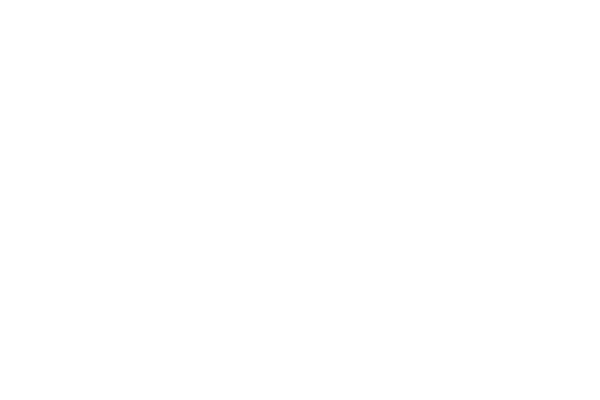

[0.55005044]


In [12]:
%matplotlib notebook

pguessogam("forearm", "h")

<IPython.core.display.Javascript object>


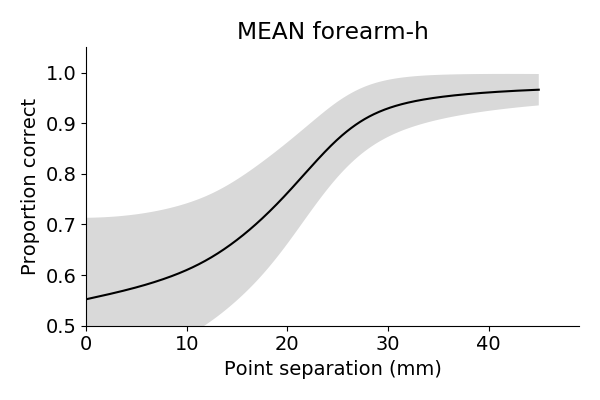

In [13]:
%matplotlib notebook

spline_h = propcorosep("forearm", "h", 0, True, True)   #propcorosep(body site, hor or ver, hor line at value,  
                                                    #smoothing, interpolate to zero dist)

#spline_v = propcorosep("forearm", "v", 0.75, True, True)

In [14]:
print(thrshfromspln(spline_h, 0.55005044))
print(thrshfromspln(spline_h, 0.95))

print(np.round(spline_h(0),4))

-0.52
34.55
0.5523
